In [1]:
import torch
from torch import nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import MNIST # Training dataset
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# obtain mnist data and process
batch_size = 128
num_of_classes = 10

def get_indices(dataset,ind_array):
    indices =  []
    for i in range(len(dataset.targets)):
        for ind in ind_array:
            if dataset.targets[i] == ind:
                indices.append(i)
    return indices

dataset = MNIST('.', train=True, download=False,transform=transforms.ToTensor())

idx = get_indices(dataset, np.arange(num_of_classes))
data_loader_target = DataLoader(dataset, batch_size=batch_size, sampler = SubsetRandomSampler(idx))
data_loader_gan = DataLoader(dataset, batch_size=batch_size, sampler = SubsetRandomSampler(idx))
data_loader_test = DataLoader(dataset, batch_size=batch_size, sampler = SubsetRandomSampler(idx))

classes = np.arange(num_of_classes)

In [3]:
%%time 

# target model
from net_conv import target_net

if torch.cuda.is_available():  
    dev = 'cuda:0'
else:  
    dev = 'cpu'

print('device: ', dev)
print('-----------------------------')

net = target_net(num_of_classes).to(dev)
criterion_tar = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

PATH = './target_models/basic_net_convolutional_'+str(num_of_classes)+'classes_device-'+dev+'.pth'
# train and and save the model
#net.train(data_loader_target, criterion_tar, optimizer,dev)
#torch.save(net.state_dict(), PATH)
# load the model
net = target_net(num_of_classes).to(dev)
net.load_state_dict(torch.load(PATH),dev)

print('model accuracy: ', net.accuracy(data_loader_gan,dev))

device:  cuda:0
-----------------------------
model accuracy:  97.9
CPU times: user 9.4 s, sys: 1.07 s, total: 10.5 s
Wall time: 10.5 s


In [8]:
from advGAN_conv import advGAN
advgan = advGAN(net,disc_coeff=450.0,hinge_coeff=350.0,adv_coeff=45.0,c=0.2,gen_path_extra='basic_advgan_conv_newARCH',device=dev)

In [ ]:
%%time
# train the gen/disc
gen,disc = advgan.train(data_loader_gan)

In [9]:
# load the generator 
gen = advgan.load_gen()

% wrong:  0.953125
-----------------------------------------
target model output:  5
target model output on adv example:  4
frobenius norm of pertubation:  4.396106243133545


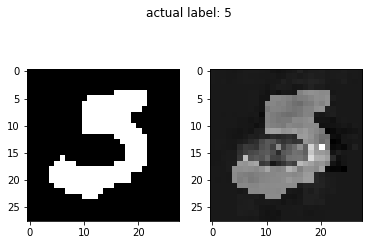

target model output:  1
target model output on adv example:  2
frobenius norm of pertubation:  2.451568603515625


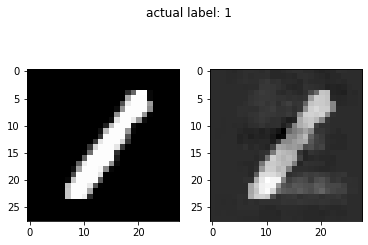

target model output:  2
target model output on adv example:  3
frobenius norm of pertubation:  3.556159734725952


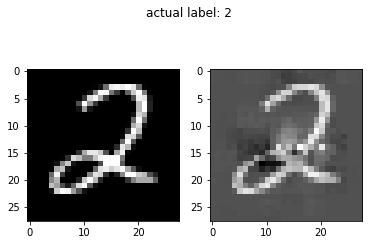

target model output:  8
target model output on adv example:  9
frobenius norm of pertubation:  3.2523791790008545


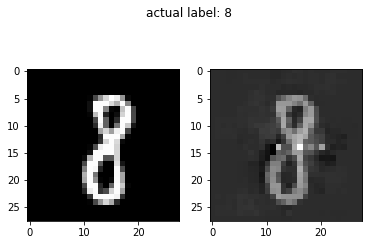

target model output:  5
target model output on adv example:  6
frobenius norm of pertubation:  4.32740592956543


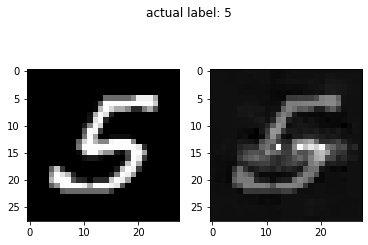

target model output:  1
target model output on adv example:  2
frobenius norm of pertubation:  1.8563203811645508


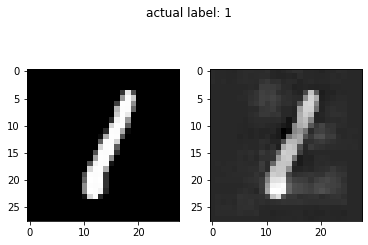

target model output:  9
target model output on adv example:  0
frobenius norm of pertubation:  3.86671781539917


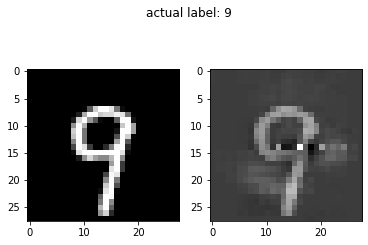

target model output:  7
target model output on adv example:  8
frobenius norm of pertubation:  2.7503724098205566


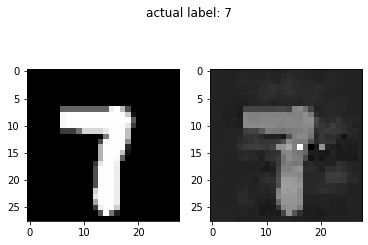

target model output:  0
target model output on adv example:  1
frobenius norm of pertubation:  5.280489444732666


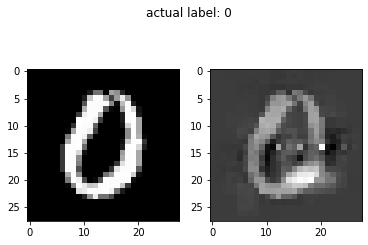

target model output:  3
target model output on adv example:  4
frobenius norm of pertubation:  3.8693454265594482


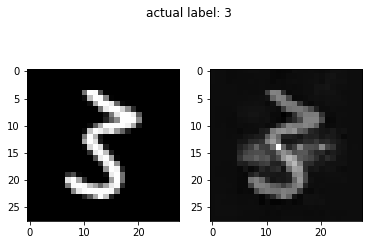

target model output:  7
target model output on adv example:  8
frobenius norm of pertubation:  3.6338610649108887


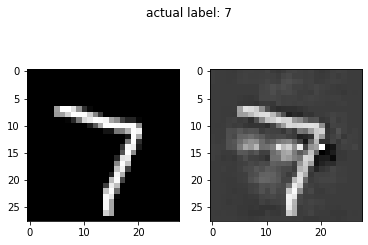

target model output:  4
target model output on adv example:  5
frobenius norm of pertubation:  4.082986831665039


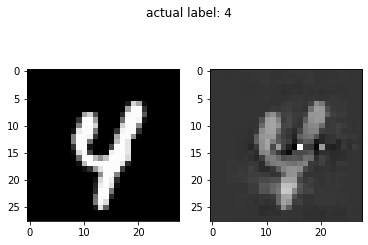

target model output:  5
target model output on adv example:  6
frobenius norm of pertubation:  4.191194534301758


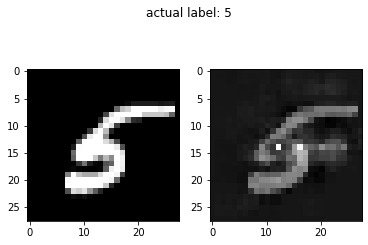

target model output:  3
target model output on adv example:  4
frobenius norm of pertubation:  4.738853454589844


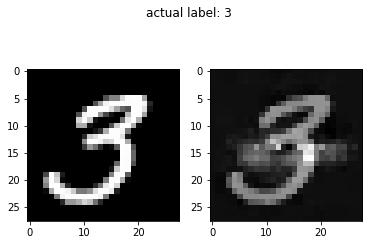

target model output:  8
target model output on adv example:  9
frobenius norm of pertubation:  3.847731590270996


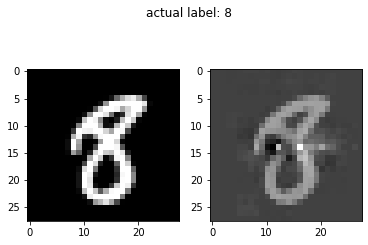

target model output:  9
target model output on adv example:  0
frobenius norm of pertubation:  4.043583869934082


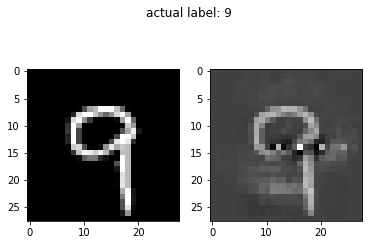

target model output:  0
target model output on adv example:  1
frobenius norm of pertubation:  5.3149189949035645


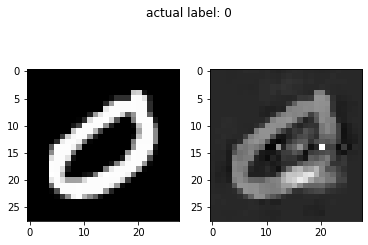

target model output:  6
target model output on adv example:  7
frobenius norm of pertubation:  4.626711845397949


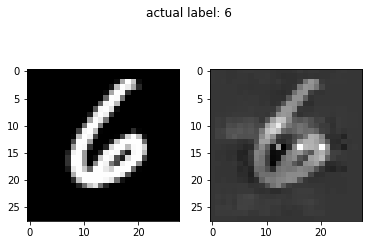

target model output:  0
target model output on adv example:  2
frobenius norm of pertubation:  6.320858001708984


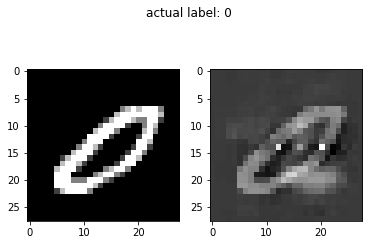

target model output:  6
target model output on adv example:  1
frobenius norm of pertubation:  2.874763250350952


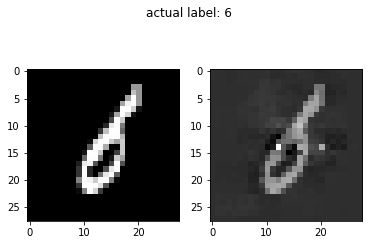

target model output:  7
target model output on adv example:  8
frobenius norm of pertubation:  3.4661738872528076


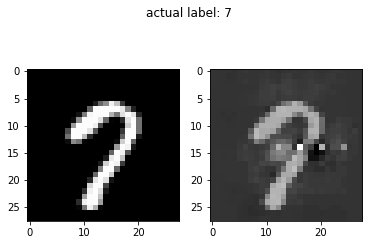

target model output:  6
target model output on adv example:  7
frobenius norm of pertubation:  4.965206146240234


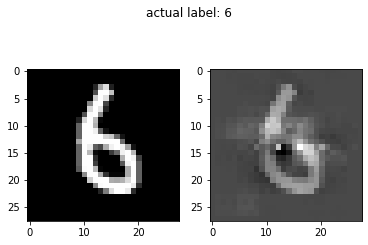

target model output:  5
target model output on adv example:  6
frobenius norm of pertubation:  4.362283229827881


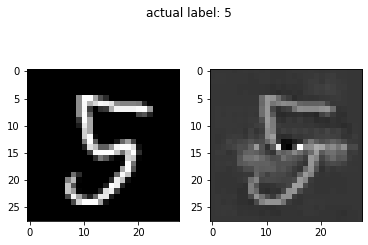

target model output:  6
target model output on adv example:  7
frobenius norm of pertubation:  3.5136520862579346


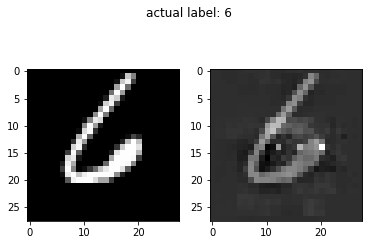

target model output:  2
target model output on adv example:  3
frobenius norm of pertubation:  3.1882078647613525


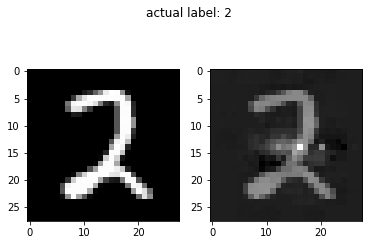

target model output:  9
target model output on adv example:  0
frobenius norm of pertubation:  3.9237828254699707


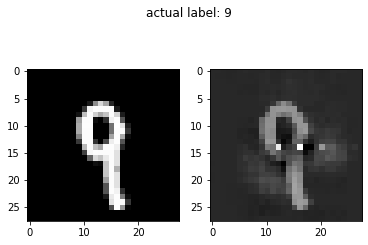

target model output:  5
target model output on adv example:  0
frobenius norm of pertubation:  3.884326934814453


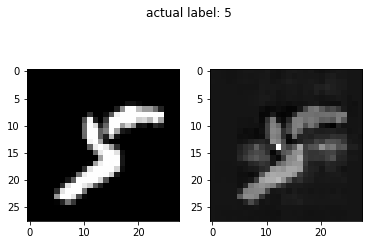

target model output:  3
target model output on adv example:  4
frobenius norm of pertubation:  5.016424655914307


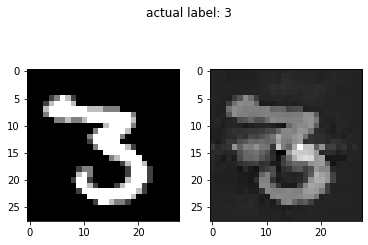

target model output:  4
target model output on adv example:  5
frobenius norm of pertubation:  4.4066162109375


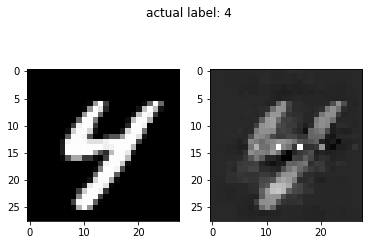

target model output:  2
target model output on adv example:  8
frobenius norm of pertubation:  3.7522835731506348


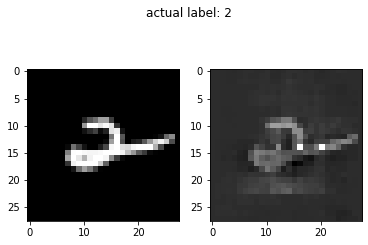

target model output:  6
target model output on adv example:  7
frobenius norm of pertubation:  5.724709510803223


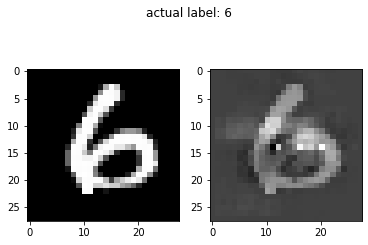

target model output:  4
target model output on adv example:  5
frobenius norm of pertubation:  6.066342830657959


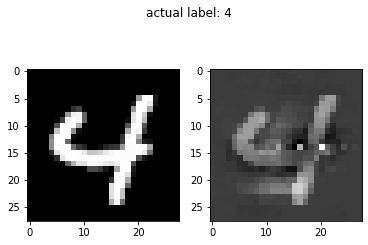

target model output:  3
target model output on adv example:  4
frobenius norm of pertubation:  5.491809368133545


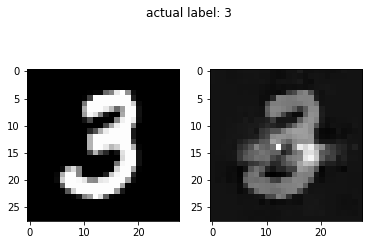

target model output:  7
target model output on adv example:  8
frobenius norm of pertubation:  4.251217842102051


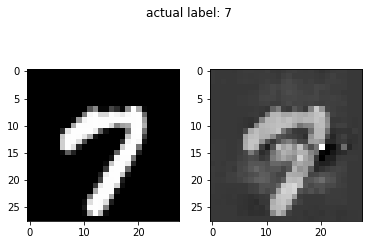

target model output:  5
target model output on adv example:  6
frobenius norm of pertubation:  4.285001754760742


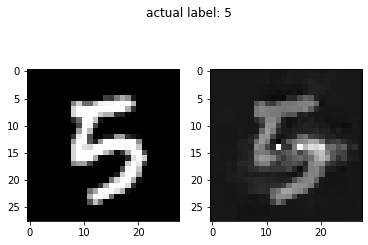

target model output:  7
target model output on adv example:  8
frobenius norm of pertubation:  3.5783770084381104


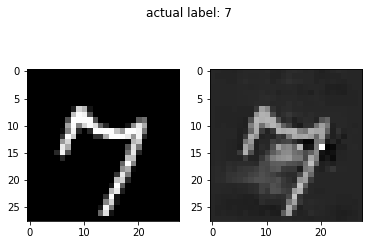

target model output:  7
target model output on adv example:  8
frobenius norm of pertubation:  4.626169204711914


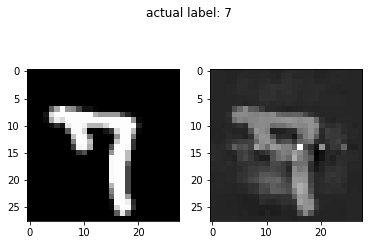

target model output:  5
target model output on adv example:  6
frobenius norm of pertubation:  4.548285484313965


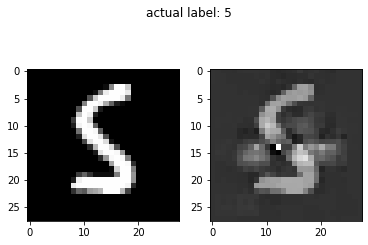

target model output:  9
target model output on adv example:  0
frobenius norm of pertubation:  5.230224609375


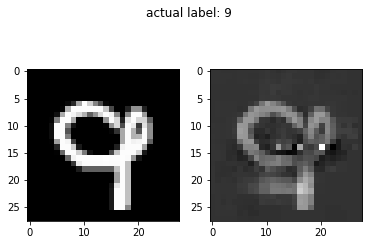

target model output:  9
target model output on adv example:  0
frobenius norm of pertubation:  5.756091594696045


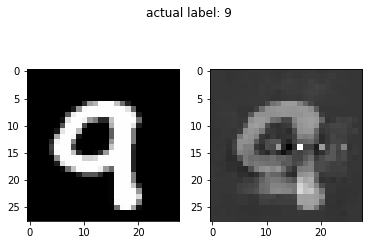

target model output:  5
target model output on adv example:  6
frobenius norm of pertubation:  3.8685362339019775


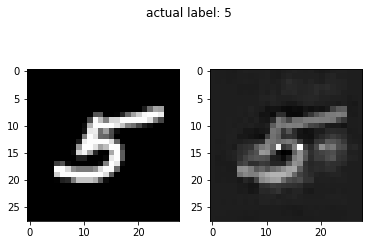

target model output:  5
target model output on adv example:  6
frobenius norm of pertubation:  2.4142611026763916


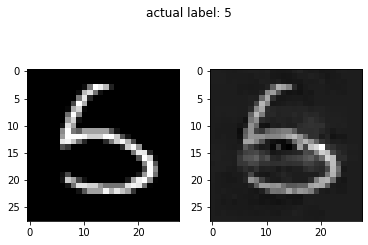

target model output:  1
target model output on adv example:  2
frobenius norm of pertubation:  1.884958028793335


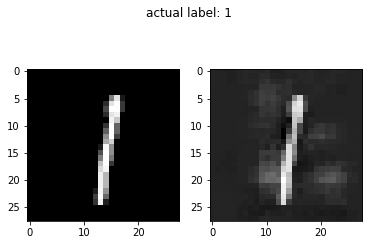

target model output:  5
target model output on adv example:  4
frobenius norm of pertubation:  5.476397514343262


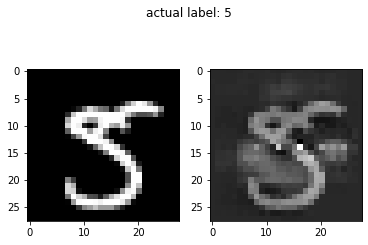

target model output:  0
target model output on adv example:  1
frobenius norm of pertubation:  4.929102420806885


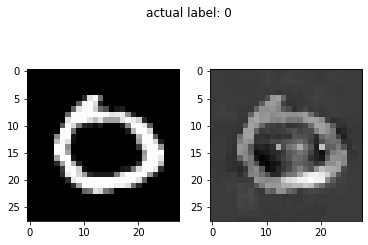

target model output:  8
target model output on adv example:  9
frobenius norm of pertubation:  4.030223846435547


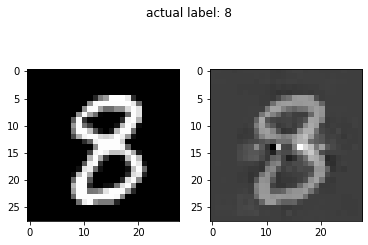

target model output:  3
target model output on adv example:  0
frobenius norm of pertubation:  3.1659226417541504


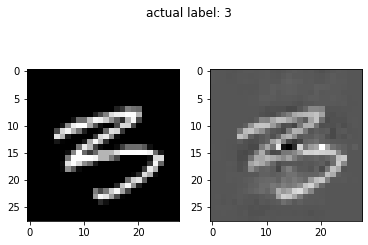

target model output:  6
target model output on adv example:  7
frobenius norm of pertubation:  5.471375465393066


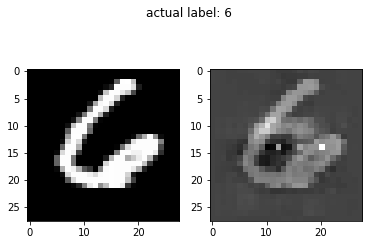

target model output:  9
target model output on adv example:  0
frobenius norm of pertubation:  4.217131614685059


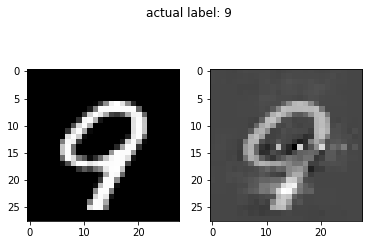

target model output:  8
target model output on adv example:  9
frobenius norm of pertubation:  3.887712001800537


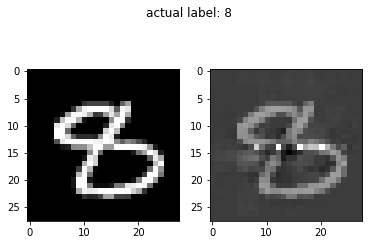

target model output:  1
target model output on adv example:  2
frobenius norm of pertubation:  1.7998141050338745


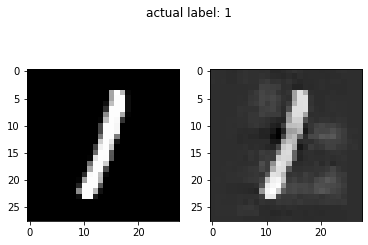

target model output:  5
target model output on adv example:  6
frobenius norm of pertubation:  4.23831844329834


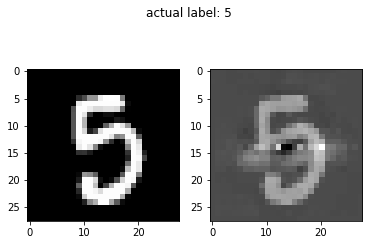

target model output:  1
target model output on adv example:  2
frobenius norm of pertubation:  2.084890127182007


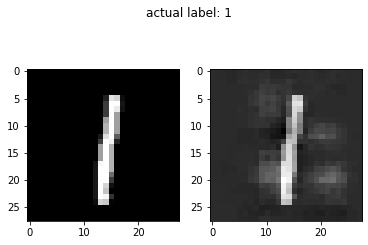

target model output:  1
target model output on adv example:  2
frobenius norm of pertubation:  2.199470281600952


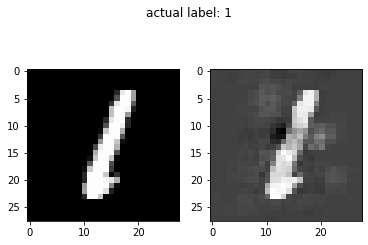

target model output:  3
target model output on adv example:  4
frobenius norm of pertubation:  4.556997299194336


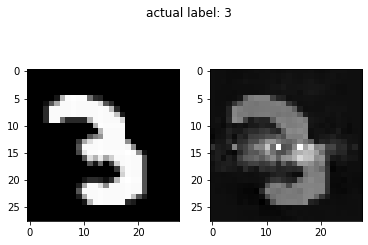

target model output:  8
target model output on adv example:  9
frobenius norm of pertubation:  2.563694953918457


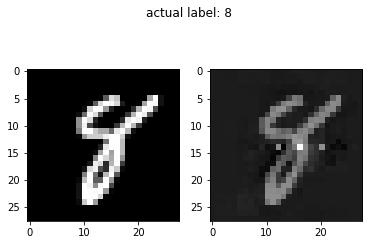

target model output:  4
target model output on adv example:  5
frobenius norm of pertubation:  3.5356392860412598


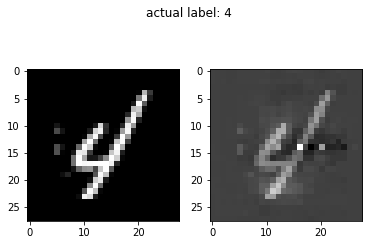

target model output:  7
target model output on adv example:  8
frobenius norm of pertubation:  4.8600616455078125


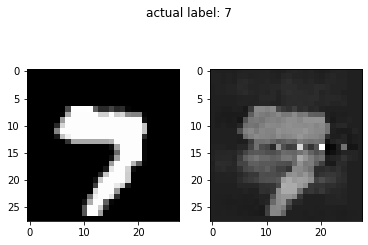

target model output:  6
target model output on adv example:  4
frobenius norm of pertubation:  6.059225082397461


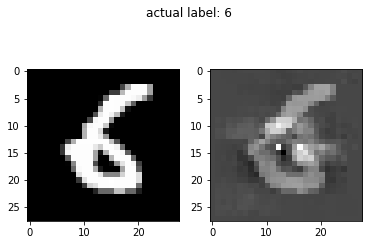

target model output:  1
target model output on adv example:  2
frobenius norm of pertubation:  1.6596248149871826


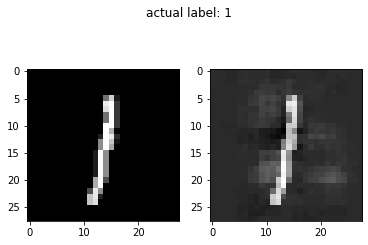

target model output:  6
target model output on adv example:  7
frobenius norm of pertubation:  4.98298454284668


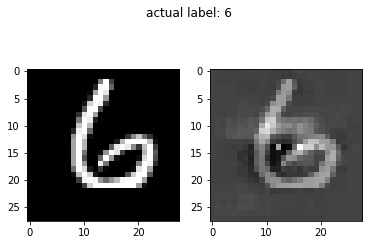

target model output:  1
target model output on adv example:  2
frobenius norm of pertubation:  1.6985384225845337


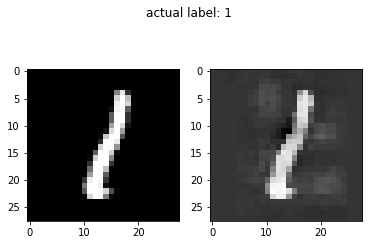

target model output:  8
target model output on adv example:  7
frobenius norm of pertubation:  4.0850019454956055


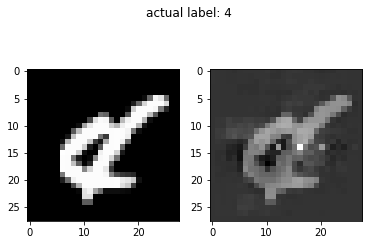

target model output:  1
target model output on adv example:  2
frobenius norm of pertubation:  1.8877551555633545


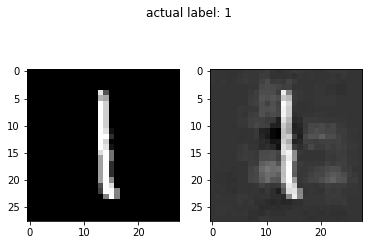

target model output:  3
target model output on adv example:  4
frobenius norm of pertubation:  4.5935869216918945


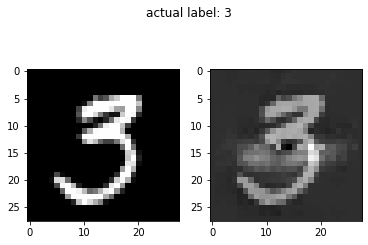

target model output:  2
target model output on adv example:  2
frobenius norm of pertubation:  5.896094799041748


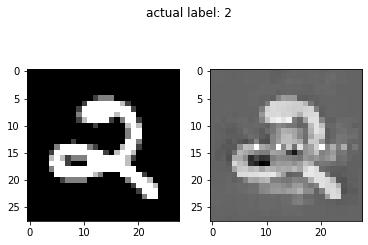

target model output:  8
target model output on adv example:  9
frobenius norm of pertubation:  3.117542266845703


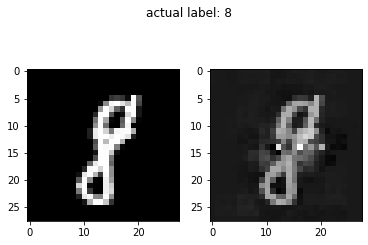

target model output:  8
target model output on adv example:  9
frobenius norm of pertubation:  4.459562301635742


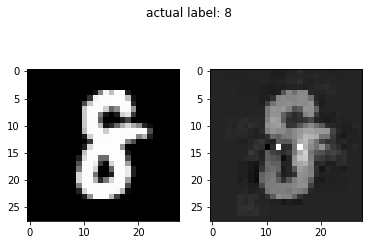

target model output:  6
target model output on adv example:  7
frobenius norm of pertubation:  4.580018520355225


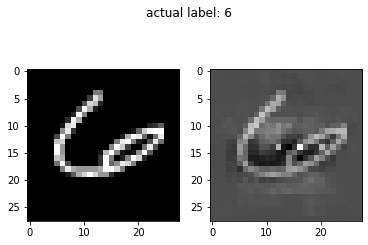

target model output:  8
target model output on adv example:  9
frobenius norm of pertubation:  3.0157406330108643


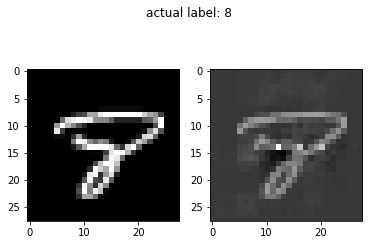

target model output:  9
target model output on adv example:  0
frobenius norm of pertubation:  4.601089954376221


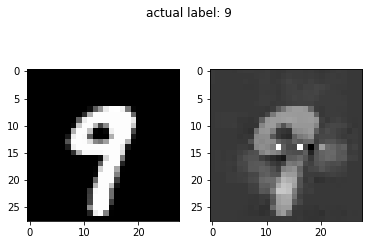

target model output:  7
target model output on adv example:  8
frobenius norm of pertubation:  4.240959167480469


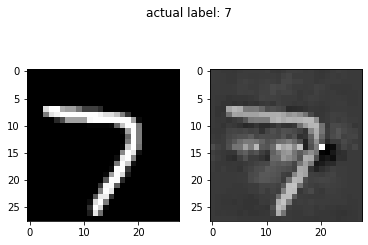

target model output:  4
target model output on adv example:  5
frobenius norm of pertubation:  3.8343191146850586


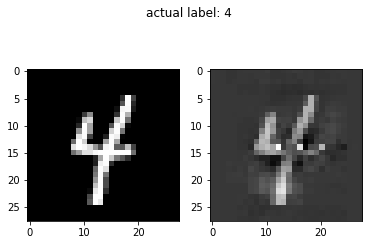

target model output:  5
target model output on adv example:  6
frobenius norm of pertubation:  4.622472763061523


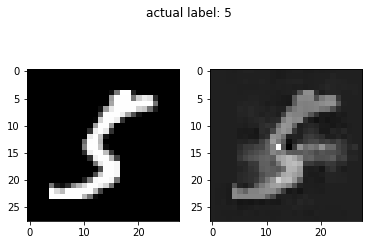

target model output:  9
target model output on adv example:  9
frobenius norm of pertubation:  3.8324484825134277


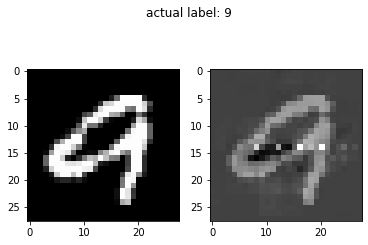

target model output:  4
target model output on adv example:  5
frobenius norm of pertubation:  4.345433235168457


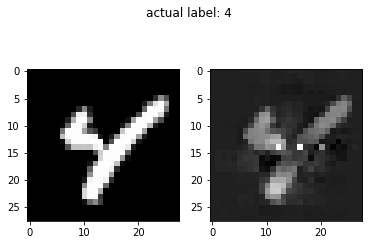

target model output:  5
target model output on adv example:  6
frobenius norm of pertubation:  4.810325622558594


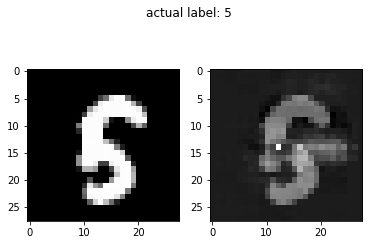

target model output:  7
target model output on adv example:  8
frobenius norm of pertubation:  3.341688632965088


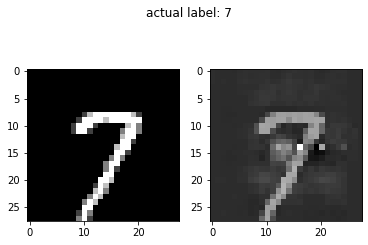

target model output:  3
target model output on adv example:  4
frobenius norm of pertubation:  5.526590824127197


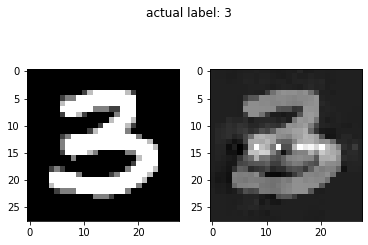

target model output:  7
target model output on adv example:  8
frobenius norm of pertubation:  3.8767337799072266


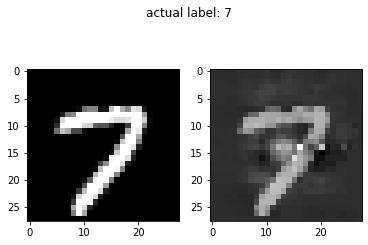

target model output:  9
target model output on adv example:  9
frobenius norm of pertubation:  3.9173731803894043


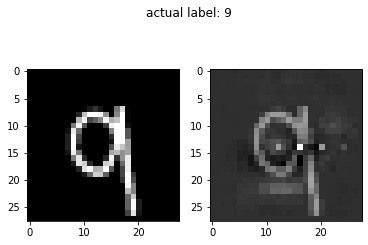

target model output:  1
target model output on adv example:  2
frobenius norm of pertubation:  3.773730516433716


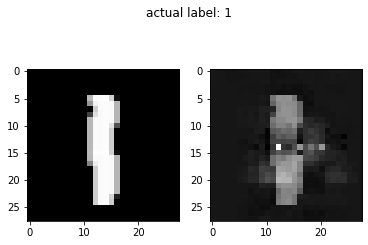

target model output:  8
target model output on adv example:  8
frobenius norm of pertubation:  2.965301036834717


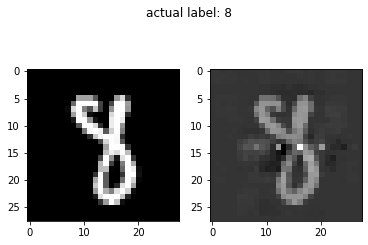

target model output:  5
target model output on adv example:  5
frobenius norm of pertubation:  2.721804618835449


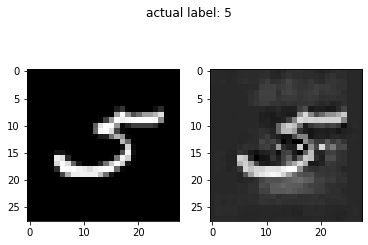

target model output:  7
target model output on adv example:  9
frobenius norm of pertubation:  3.62324595451355


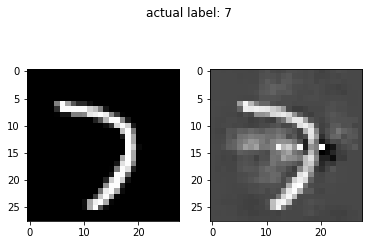

target model output:  3
target model output on adv example:  4
frobenius norm of pertubation:  3.976161479949951


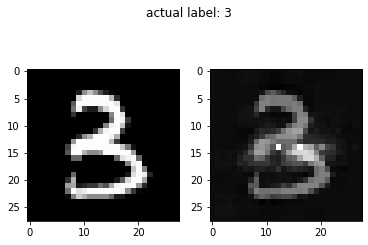

target model output:  0
target model output on adv example:  1
frobenius norm of pertubation:  5.2581467628479


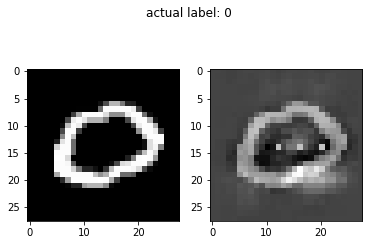

target model output:  5
target model output on adv example:  6
frobenius norm of pertubation:  5.1957221031188965


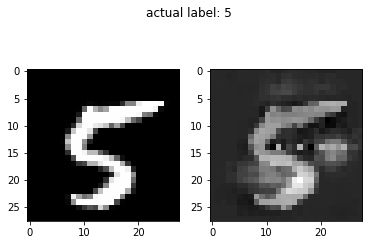

target model output:  1
target model output on adv example:  2
frobenius norm of pertubation:  2.8200368881225586


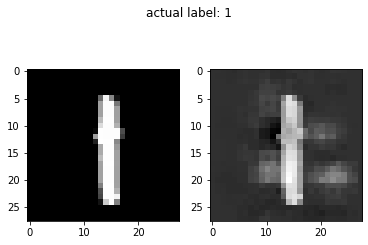

target model output:  2
target model output on adv example:  3
frobenius norm of pertubation:  5.134230136871338


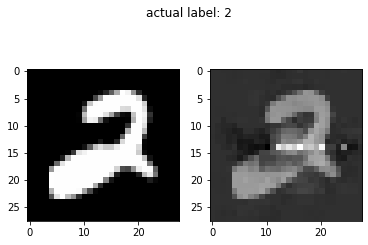

target model output:  0
target model output on adv example:  0
frobenius norm of pertubation:  5.695069313049316


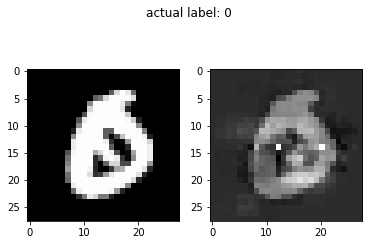

target model output:  0
target model output on adv example:  9
frobenius norm of pertubation:  5.275866508483887


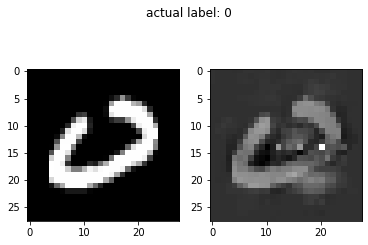

target model output:  5
target model output on adv example:  6
frobenius norm of pertubation:  4.846094131469727


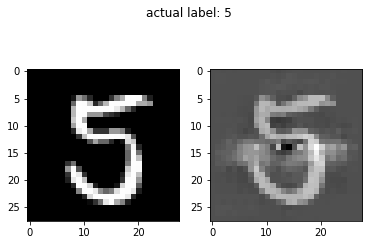

target model output:  1
target model output on adv example:  2
frobenius norm of pertubation:  1.867303729057312


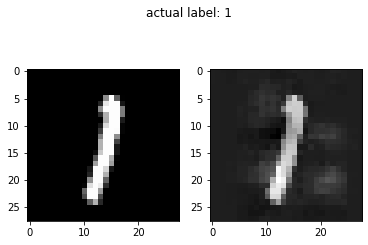

target model output:  9
target model output on adv example:  0
frobenius norm of pertubation:  3.1633572578430176


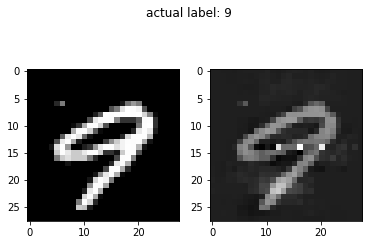

target model output:  8
target model output on adv example:  9
frobenius norm of pertubation:  3.6573987007141113


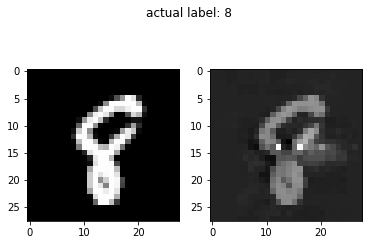

target model output:  0
target model output on adv example:  9
frobenius norm of pertubation:  3.164412021636963


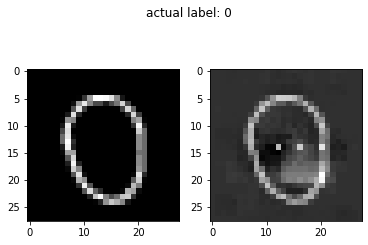

target model output:  3
target model output on adv example:  4
frobenius norm of pertubation:  4.609611988067627


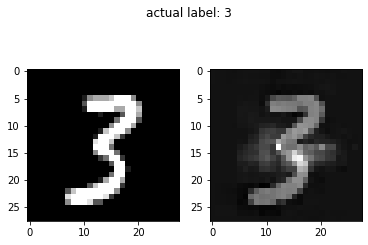

target model output:  8
target model output on adv example:  9
frobenius norm of pertubation:  4.12108039855957


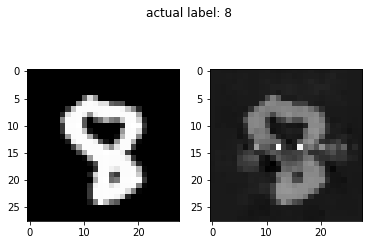

target model output:  2
target model output on adv example:  8
frobenius norm of pertubation:  3.8977363109588623


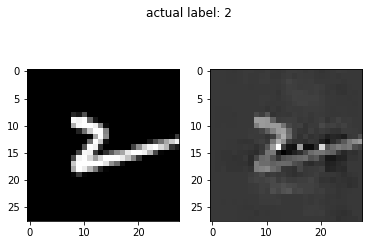

target model output:  8
target model output on adv example:  9
frobenius norm of pertubation:  4.012290954589844


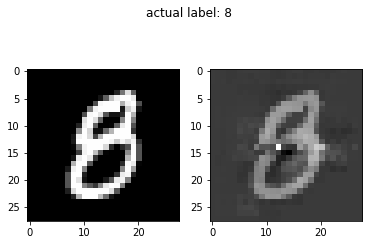

target model output:  9
target model output on adv example:  0
frobenius norm of pertubation:  4.053182601928711


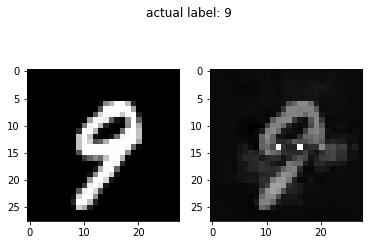

target model output:  0
target model output on adv example:  1
frobenius norm of pertubation:  4.594902038574219


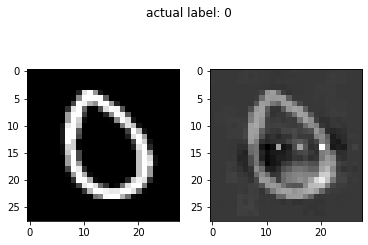

target model output:  7
target model output on adv example:  8
frobenius norm of pertubation:  3.41249418258667


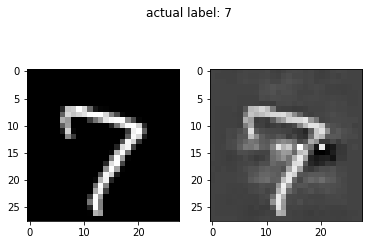

target model output:  0
target model output on adv example:  9
frobenius norm of pertubation:  4.162947654724121


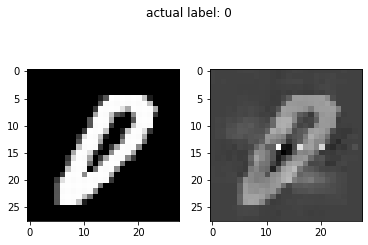

target model output:  2
target model output on adv example:  3
frobenius norm of pertubation:  4.6202874183654785


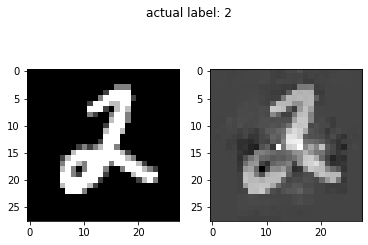

target model output:  5
target model output on adv example:  8
frobenius norm of pertubation:  5.642868518829346


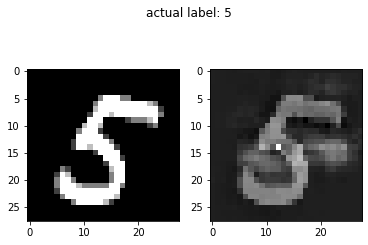

target model output:  9
target model output on adv example:  0
frobenius norm of pertubation:  4.785959720611572


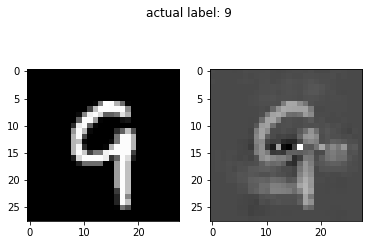

target model output:  8
target model output on adv example:  9
frobenius norm of pertubation:  3.321221113204956


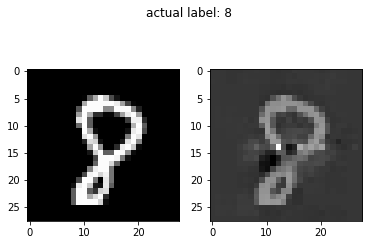

target model output:  0
target model output on adv example:  1
frobenius norm of pertubation:  4.670671463012695


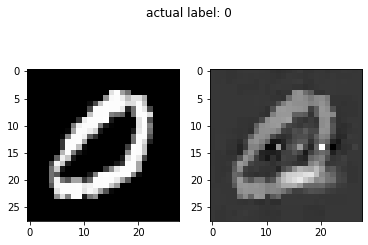

target model output:  2
target model output on adv example:  3
frobenius norm of pertubation:  4.975240230560303


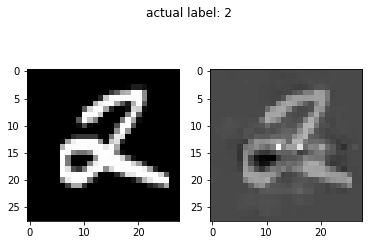

target model output:  6
target model output on adv example:  7
frobenius norm of pertubation:  5.394034385681152


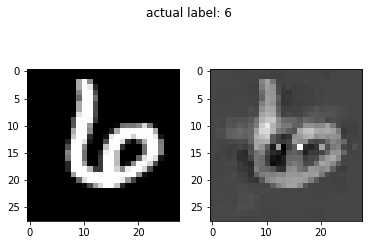

target model output:  1
target model output on adv example:  2
frobenius norm of pertubation:  2.2085890769958496


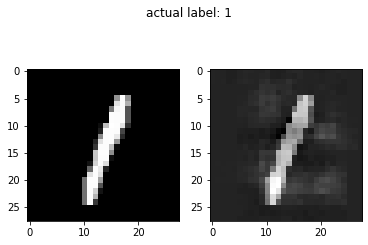

target model output:  8
target model output on adv example:  9
frobenius norm of pertubation:  3.8640499114990234


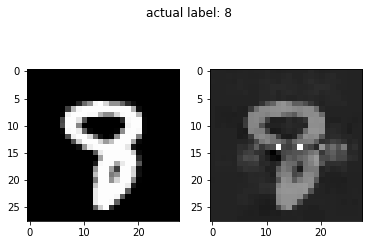

target model output:  2
target model output on adv example:  3
frobenius norm of pertubation:  4.277143955230713


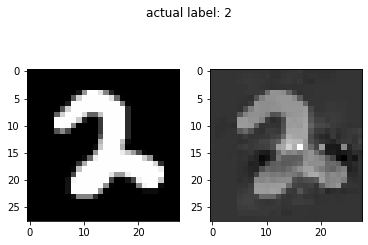

target model output:  3
target model output on adv example:  4
frobenius norm of pertubation:  4.676692962646484


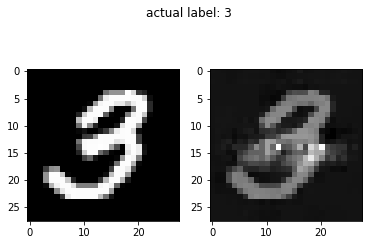

target model output:  1
target model output on adv example:  2
frobenius norm of pertubation:  1.8564207553863525


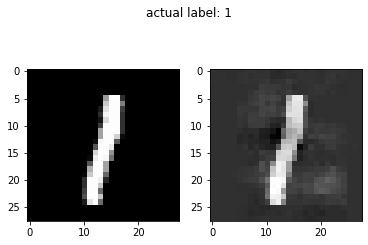

target model output:  4
target model output on adv example:  0
frobenius norm of pertubation:  3.3245978355407715


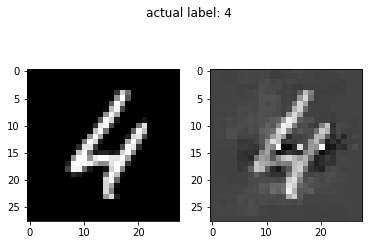

target model output:  2
target model output on adv example:  3
frobenius norm of pertubation:  4.7155585289001465


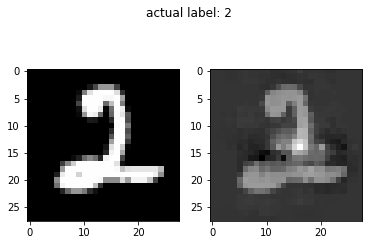

target model output:  9
target model output on adv example:  0
frobenius norm of pertubation:  3.67089581489563


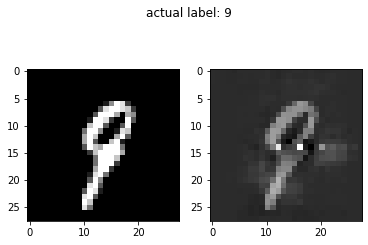

target model output:  7
target model output on adv example:  8
frobenius norm of pertubation:  4.264369964599609


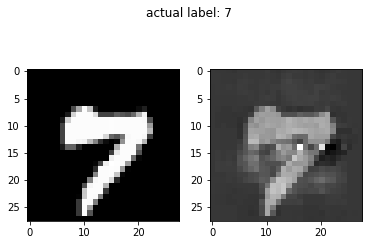

target model output:  2
target model output on adv example:  3
frobenius norm of pertubation:  3.7958357334136963


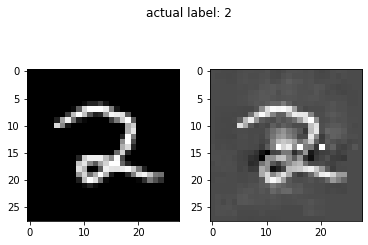

target model output:  3
target model output on adv example:  4
frobenius norm of pertubation:  3.726154088973999


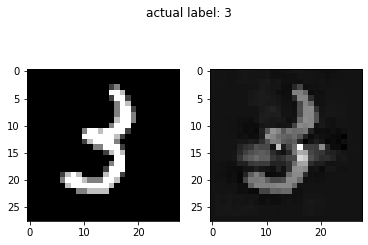

target model output:  6
target model output on adv example:  7
frobenius norm of pertubation:  4.602842330932617


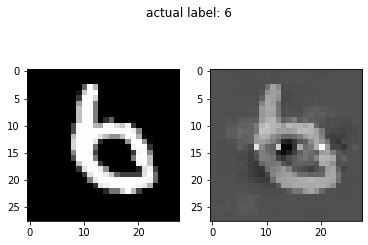

target model output:  1
target model output on adv example:  2
frobenius norm of pertubation:  2.3360631465911865


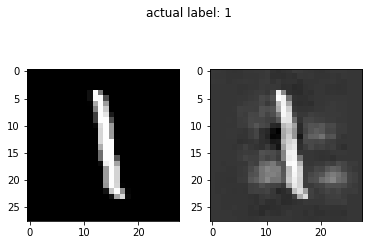

target model output:  7
target model output on adv example:  8
frobenius norm of pertubation:  4.468998432159424


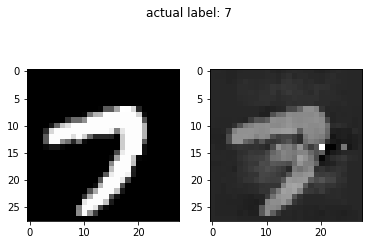

target model output:  0
target model output on adv example:  1
frobenius norm of pertubation:  5.75080680847168


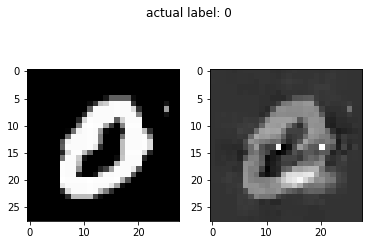

target model output:  3
target model output on adv example:  4
frobenius norm of pertubation:  4.254131317138672


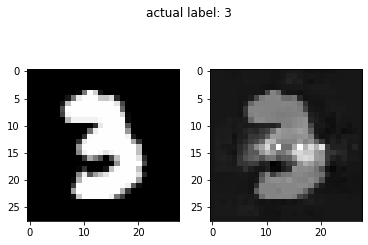

In [10]:
from sklearn.metrics import accuracy_score

def one_batch(data,num=1):
    for i,(img,lbl) in enumerate(data):
        if i == num:
            return img,lbl
            break

images,labels = one_batch(data_loader_test,num=1)
perts = gen(images.to(dev))
adv_images = (images.to(dev) + perts).to(dev)
net_out = net(images.to(dev)).to(dev)
adv_pred = net(adv_images).to(dev)

print('% wrong: ',1.-accuracy_score(labels.cpu(),torch.argmax(adv_pred,dim=1).cpu()))
print('-----------------------------------------')
for img,lbl,adimg,out,adpred,p in zip(images,labels,adv_images,net_out,adv_pred,perts):
    print('target model output: ', int(torch.argmax(out).detach()))
    print('target model output on adv example: ', int(torch.argmax(adpred).detach()))
    print('frobenius norm of pertubation: ',float(torch.norm(p,'fro').detach()))
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('actual label: '+str(int(lbl.detach())))
    ax1.imshow(img.reshape(28,28).detach().numpy(),cmap='gray')
    ax2.imshow(adimg.reshape(28,28).cpu().detach().numpy(),cmap='gray')
    plt.show()
